Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [3]:
folder_name = 'label_09'

*Label* 02

In [4]:
cols = list(pd.read_csv(f"{folder_name}/train.csv", nrows=1))
train_data = pd.read_csv(f"{folder_name}/train.csv",usecols =[i for i in cols if i not in ["label_4", "label_2", "label_1"]])
train_data.shape

(28520, 769)

Handling missing values

In [5]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28520, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_3
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,0.124449,0.124765,-0.235671,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,1
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.186260,0.085101,-0.365903,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,1
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.019542,0.144256,-0.123374,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,1
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,0.117235,-0.038984,-0.028714,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,1
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,0.029716,0.077643,-0.182132,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,1


numbers of missing values neglegible

Import test data set

In [6]:
cols = list(pd.read_csv(f"{folder_name}/valid.csv", nrows=1))
valid_data = pd.read_csv(f"{folder_name}/valid.csv",usecols =[i for i in cols if i not in ["label_4", "label_2", "label_1"]])
valid_data.shape

(750, 769)

Handling missing values

In [7]:
valid_data = valid_data.dropna()
valid_data.shape

(750, 769)

In [8]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [9]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [10]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28520, 466)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

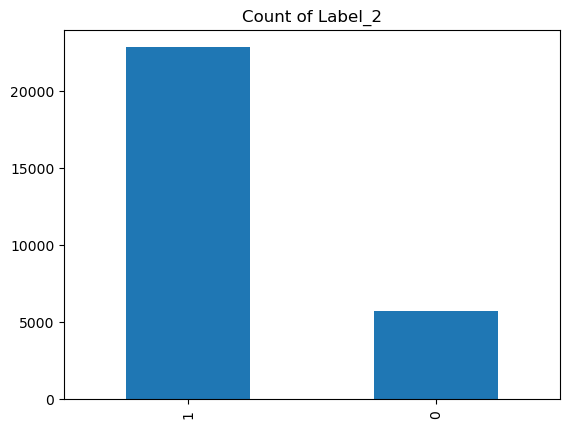

In [11]:
train_data['label_3'].value_counts().plot(kind='bar',title='Count of Label_2')

(45590, 466)


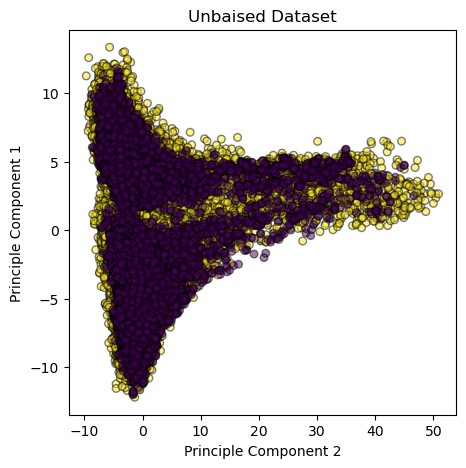

In [12]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Cross validation

In [14]:
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
svc_init = SVC()
svc_scores = cross_val_score(svc_init, X_train_scaler, Y_train, cv=2) 
print("Cross-Validation Scores for SVC:", svc_scores)
print("Mean Accuracy:", svc_scores.mean())

from sklearn.ensemble import RandomForestClassifier
rf_init = RandomForestClassifier()
rf_scores = cross_val_score(rf_init, X_train_scaler, Y_train, cv=2)
print("Cross-Validation Scores for Random Forest:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

from sklearn.neighbors import KNeighborsClassifier
knn_init = KNeighborsClassifier()
knn_scores = cross_val_score(knn_init, X_train_scaler, Y_train, cv=2)
print("Cross-Validation Scores for KNN:", knn_scores)
print("Mean Accuracy:", knn_scores.mean())

Cross-Validation Scores for SVC: [0.97798036 0.9641655 ]
Mean Accuracy: 0.9710729312762973
Cross-Validation Scores for Random Forest: [0.90140252 0.88779804]
Mean Accuracy: 0.8946002805049089
Cross-Validation Scores for KNN: [0.90119215 0.89628331]
Mean Accuracy: 0.8987377279102384


Using SVC

In [12]:
from sklearn.svm import SVC

In [15]:
svc_init = SVC()
svc_init.fit(X_train_scaler,Y_train)
svc_predicted = svc_init.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

0.9973333333333333

After feature engineering

In [18]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

0.996

Hyper Parameter tuning without dimentionality reduction

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_pca, Y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time= 8.5min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time= 8.6min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time= 8.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time= 8.6min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time= 8.6min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time= 8.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time= 8.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time= 8.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time= 8.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time= 8.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.825 total time= 6.6min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid.fit(X_train_smt, Y_train_smt)
grid_predictions = grid.predict(X_valid_pca)

# print classification report
accuracy_score(Y_valid, grid_predictions)

In [ ]:
cols = list(pd.read_csv(f"{folder_name}/test.csv", nrows=1))
test_data = pd.read_csv(f"{folder_name}/test.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
test_data.shape

#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)
grid_predictions1 = svc_init.predict(X_test_scaler)
grid_predictions1

In [ ]:
size = grid_predictions1.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_1': grid_predictions1
}
df = pd.DataFrame(data)
df.to_csv('09-1-init.csv', index=False)

Explainablility

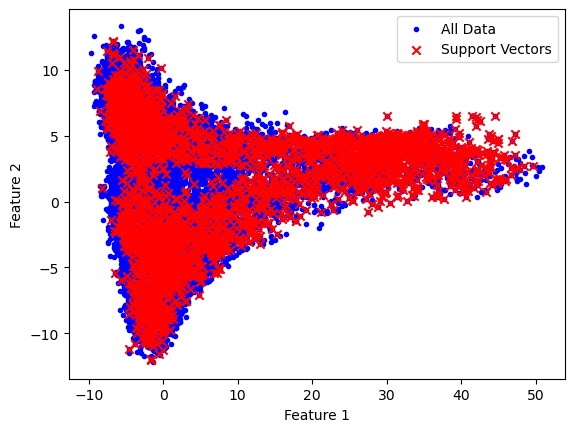

In [19]:
support_vectors = svc.support_vectors_
plt.scatter(X_train_smt[:, 0], X_train_smt[:, 1], c='b', marker='.', label='All Data')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='r', marker='x', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_valid, svc_predicted)
print(confusion_matrix)

[[141   1]
 [  2 606]]


In [21]:
from sklearn.metrics import  classification_report
class_report = classification_report(Y_valid, svc_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [16]:
np.corrcoef(X_train_smt,rowvar=False)

array([[ 1.        , -0.01610454, -0.0119337 , ..., -0.01452707,
         0.01035643,  0.01869822],
       [-0.01610454,  1.        ,  0.01308275, ..., -0.00194687,
        -0.03155558,  0.00280562],
       [-0.0119337 ,  0.01308275,  1.        , ..., -0.00300462,
        -0.00439094,  0.00843121],
       ...,
       [-0.01452707, -0.00194687, -0.00300462, ...,  1.        ,
        -0.00686655, -0.00376094],
       [ 0.01035643, -0.03155558, -0.00439094, ..., -0.00686655,
         1.        , -0.01250479],
       [ 0.01869822,  0.00280562,  0.00843121, ..., -0.00376094,
        -0.01250479,  1.        ]])